# Defense_Spending
## Exploratory Analysis of SIPRI Defense Spending Data

In [8]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pca import pca
import seaborn as sns

In [2]:
data_dir = "~/Box/ECMA-31330-Project"

We can look at spending per GDP or spending as a share of government spending.

In [21]:
sipri_milex_per_gdp = (pd.read_excel(data_dir+"/SIPRI-Milex-data-1949-2020_0.xlsx", sheet_name="Share of GDP", header=5, engine='openpyxl')
                         .drop(columns='Notes')
                         # Threshold requires a non-NaN country column and at least one observation
                         .dropna(thresh=2)
                         .replace({"xxx":np.NaN, ". .":np.NaN})
                         # Remove "Unnamed" columns
                         .filter(regex='^((?!Unnamed).)*$')
                         .set_index('Country')
                         .transpose())

sipri_milex_per_gdp

Country   Algeria  Libya   Morocco   Tunisia    Angola     Benin  Botswana  \
1949          NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1950          NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1951          NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1952          NaN    NaN       NaN       NaN       NaN       NaN       NaN   
1953          NaN    NaN       NaN       NaN       NaN       NaN       NaN   
...           ...    ...       ...       ...       ...       ...       ...   
2016     0.063849    NaN  0.032195  0.023608  0.027333  0.006736  0.032878   
2017     0.059244    NaN  0.031830  0.021443  0.025080  0.009206  0.030059   
2018     0.054678    NaN  0.031186  0.021134  0.018718  0.006329  0.026761   
2019     0.060210    NaN  0.030999  0.025646  0.016437  0.004729  0.028123   
2020     0.066600    NaN  0.042810  0.029077  0.016159  0.004706  0.035023   

Country  Burkina Faso   Burundi  Cameroon  ...    Kuwait   Lebanon      Oman  \
1949              NaN       NaN       NaN  ...       NaN       NaN       NaN   
1950              NaN       NaN       NaN  ...       NaN       NaN       NaN   
1951              NaN       NaN       NaN  ...       NaN       NaN       NaN   
1952              NaN       NaN       NaN  ...       NaN       NaN       NaN   
1953              NaN       NaN       NaN  ...       NaN       NaN       NaN   
...               ...       ...       ...  ...       ...       ...       ...   
2016         0.013754  0.021156  0.011875  ...  0.058935  0.050627  0.121195   
2017         0.015563  0.018707  0.011738  ...  0.056075  0.045051  0.096358   
2018         0.021650  0.018822  0.011116  ...  0.051000  0.049528  0.095430   
2019         0.026060  0.024972  0.010868  ...  0.054842  0.047079  0.086377   
2020         0.027340  0.019792  0.010104  ...  0.064961  0.030326  0.108709   

Country  Qatar  Saudi Arabia  Syria    Turkey  UAE  Yemen  Yemen, North  
1949       NaN           NaN    NaN       NaN  NaN    NaN           NaN  
1950       NaN           NaN    NaN       NaN  NaN    NaN           NaN  
1951       NaN           NaN    NaN       NaN  NaN    NaN           NaN  
1952       NaN           NaN    NaN       NaN  NaN    NaN           NaN  
1953       NaN           NaN    NaN       NaN  NaN    NaN           NaN  
...        ...           ...    ...       ...  ...    ...           ...  
2016       NaN      0.098727    NaN  0.020503  NaN    NaN           NaN  
2017       NaN      0.102238    NaN  0.020501  NaN    NaN           NaN  
2018       NaN      0.094692    NaN  0.025240  NaN    NaN           NaN  
2019       NaN      0.078127    NaN  0.027103  NaN    NaN           NaN  
2020       NaN      0.084476    NaN  0.027725  NaN    NaN           NaN  

[72 rows x 173 columns]

In [22]:
N = sipri_milex_per_gdp.shape[0]
T = sipri_milex_per_gdp.shape[1]

N, T

(72, 173)

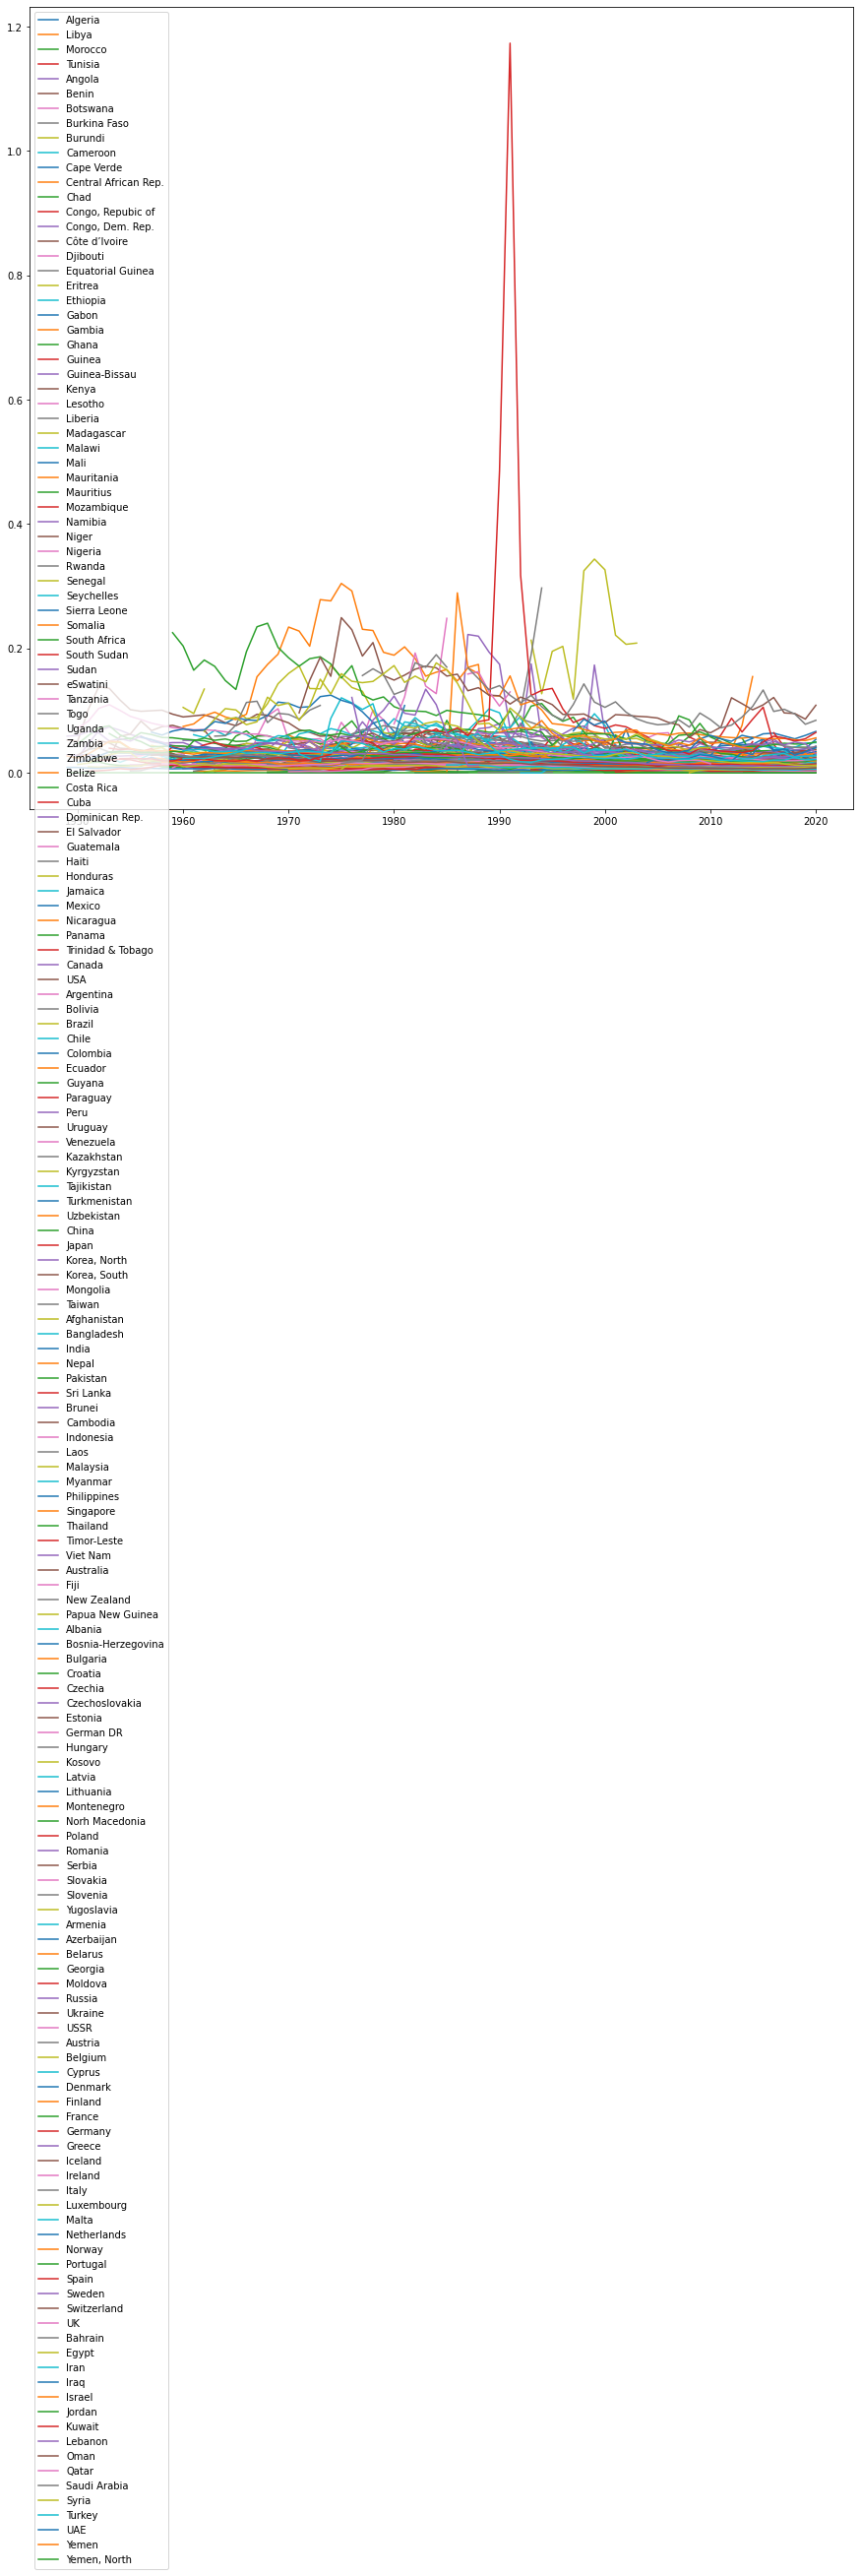

In [23]:
plt.figure(figsize=(15,15))
plt.plot(sipri_milex_per_gdp);
plt.legend(sipri_milex_per_gdp.columns);
plt.show()

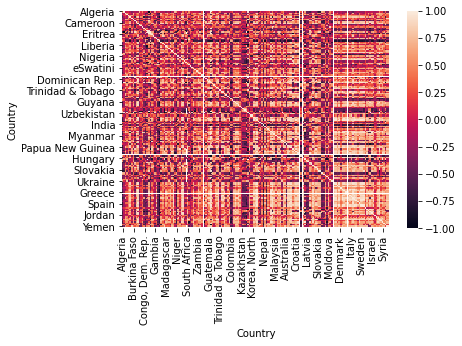

In [24]:
#Exploring correlations 
sns.heatmap(sipri_milex_per_gdp.corr());

In [ ]:
#scatter_matrix(sipri_milex_per_gdp, figsize=(20, 20), diagonal='kde');

In [ ]:
deMeansipri_milex_per_gdp = sipri_milex_per_gdp - np.mean(sipri_milex_per_gdp, axis=0) 
modelsipri_milex_per_gdp = pca(n_components=deMeansipri_milex_per_gdp.shape[1])
resultssipri_milex_per_gdp = modelsipri_milex_per_gdp.fit_transform(deMeansipri_milex_per_gdp)
sns.heatmap(resultssipri_milex_per_gdp['loadings'],cmap='YlGnBu');

In [ ]:
modelsipri_milex_per_gdp.plot();

In [ ]:
K = 3
Fhat = resultssipri_milex_per_gdp['PC'].iloc[:,0:K].to_numpy()
Mus = resultssipri_milex_per_gdp['loadings'].iloc[0:K].to_numpy()
Yhat = Fhat@Mus

In [ ]:
plt.scatter(deMeansipri_milex_per_gdp.iloc[:,0],Yhat[:,0])
plt.show()

plt.plot(deMeansipri_milex_per_gdp.index,deMeansipri_milex_per_gdp.iloc[:,0])
plt.plot(deMeansipri_milex_per_gdp.index,Yhat[:,0])
plt.show()

plt.plot(deMeansipri_milex_per_gdp.index,deMeansipri_milex_per_gdp.iloc[:,1])
plt.plot(deMeansipri_milex_per_gdp.index,Yhat[:,1])
plt.show()